In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

# Cargar los datos de la encuesta
file_path = 'Relavamiento estimación ágil (respuestas) - Respuestas de formulario 1.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para verificar
data.head()


,Marca temporal,Dirección de correo electrónico,"Presto mi consentimiento para la recolección de datos personales necesarios para la realización de la encuesta, de acuerdo con mis derechos reconocidos en la ley 25.326 de Protección de Datos Personales.",Nombre de la empresa/organización a la que pertenece:,¿Qué rol ocupa dentro de la organización donde trabaja actualmente?,¿Cuántos años de experiencia tiene en desarrollo de software?,Indique su modalidad de trabajo actual,¿De qué tamaño es la empresa/organización donde trabaja?,¿En dónde se encuentra ubicada la empresa donde trabaja?,¿Trabaja con un enfoque ágil de desarrollo de software?,...,"En caso de que realicen seguimiento, ¿qué métricas utilizan para evaluar la precisión de las estimaciones? (Seleccione todas las opciones que apliquen)",¿Qué tan precisas considera que son las estimaciones de su equipo?,¿Considera que las técnicas y prácticas actuales de estimación utilizadas por su equipo son efectivas y precisas?,¿Con qué frecuencia encuentra inexactitudes en las estimaciones?,Desde que comenzó a trabajar con su equipo actual ¿Considera que la precisión de las estimaciones ha mejorado con el tiempo?,¿Considera que la implementación de nuevas técnicas de estimación ágil podría mejorar la eficiencia de los proyectos en su empresa?,"Si utiliza una herramienta para registrar las estimaciones, ¿Qué tan útil la considera?",¿Existen inconvenientes o caracteristicas de la herramienta donde registra estimaciones que no le guste o considere contra-producente? -,¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen),¿Cuáles considera que son los principales factores externos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)
0,29/09/2024 12:57:16,luisgonzalocao@gmail.com,Sí,--,Desarrollador Frontend/Backend,Entre 3 y 5 años,Remoto,Grande - más de DOSCIENTOS (200) trabajadores,Buenos Aires,Si,...,Frecuencia de cumplimiento de las estimaciones,4.0,Efectivas,2.0,Sí,Si,5.0,NaN,Ninguna de las anteriores,Ninguna de las anteriores
1,2/10/2024 11:36:38,pedroalegre29@gmail.com,Sí,42 Mate,Desarrollador Frontend/Backend,Entre 3 y 5 años,Remoto,Pequeña - hasta CINCUENTA (50) trabajadores,Chaco,Si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/10/2024 14:13:44,ballestafranco@gmail.com,Sí,Banco de corrientes,Desarrollador de core,Menos de 1 año,Presencial,Mediana - de CINCUENTA Y UN (51) a DOSCIENTOS ...,Corrientes,No,...,Variación entre estimación y tiempo real,2.0,Poco efectivas,4.0,No,Si,NaN,"Para comenzar, directamente mi equipo no parti...","Complejidad del proyecto, Alcance del proyecto...","Cambios en los requisitos, Presión del cliente..."
3,3/10/2024 11:39:42,marygabyhhh@gmail.com,Sí,"""-""",Analista QA (Tester),Más de 5 años,Híbrido (trabajar remoto y en oficina),Grande - más de DOSCIENTOS (200) trabajadores,Chaco,Si,...,Frecuencia de cumplimiento de las estimaciones,4.0,Efectivas,2.0,Sí,Si,5.0,No,"Variabilidad en la experiencia del equipo, Com...",Ninguna de las anteriores
4,3/10/2024 16:14:59,francoenzo1999@hotmail.com,Sí,Banco del sol,Desarrollador Frontend/Backend,Entre 1 y 3 años,Remoto,Mediana - de CINCUENTA Y UN (51) a DOSCIENTOS ...,Buenos Aires,No,...,"Variación entre estimación y tiempo real, Núme...",3.0,Efectivas,2.0,No estoy seguro,Si,3.0,NaN,"Complejidad del proyecto, Alcance del proyecto...",Cambios en los requisitos


<div style="font-size: 40px; font-family: Verdana;">
    BLOQUE 1
</div>
</br>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    1 - Se remueven las columnas irrelevantes para el analisis cuantitativo
</div>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    2 - Manejo de valores nulos: Opcionalmente podemos rellenar nulos en preguntas opcionales o dejarlas como están
</div>

In [2]:

data = data.drop(columns=["Marca temporal", "Dirección de correo electrónico",
                        "Presto mi consentimiento para la recolección de datos personales necesarios para la realización de la encuesta, de acuerdo con mis derechos reconocidos en la ley 25.326 de Protección de Datos Personales.", "Nombre de la empresa/organización a la que pertenece:"])


data.fillna("No especificado", inplace=True)

# Mostrar columnas y tipos de datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 44 columns):
 #   Column                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                               --------------  ----- 
 0   ¿Qué rol ocupa dentro de la organización donde trabaja actualmente?                                                                                                  42 non-null     object
 1   ¿Cuántos años de experiencia tiene en desarrollo de software?                                                                                                        42 non-null     object
 2   Indique su modalidad de trabajo actual                                                                                  

C:\Users\chuch\AppData\Local\Temp\ipykernel_4148\466198789.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No especificado' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("No especificado", inplace=True)


<div style="font-size: 40px; font-family: Verdana;">
    BLOQUE 2
</div>
</br>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    1 - Primer grafico :  Distribución de roles, con cantidad de trabajadores por rol especifico
</div>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    2 - Segundo grafico : Años de experiencia
</div>

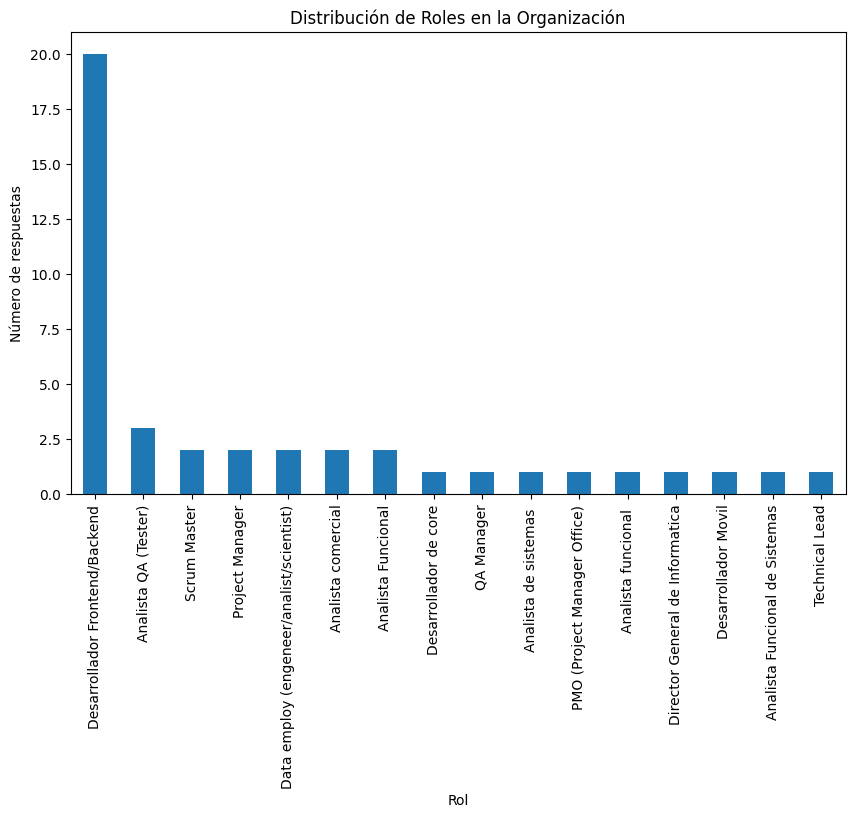

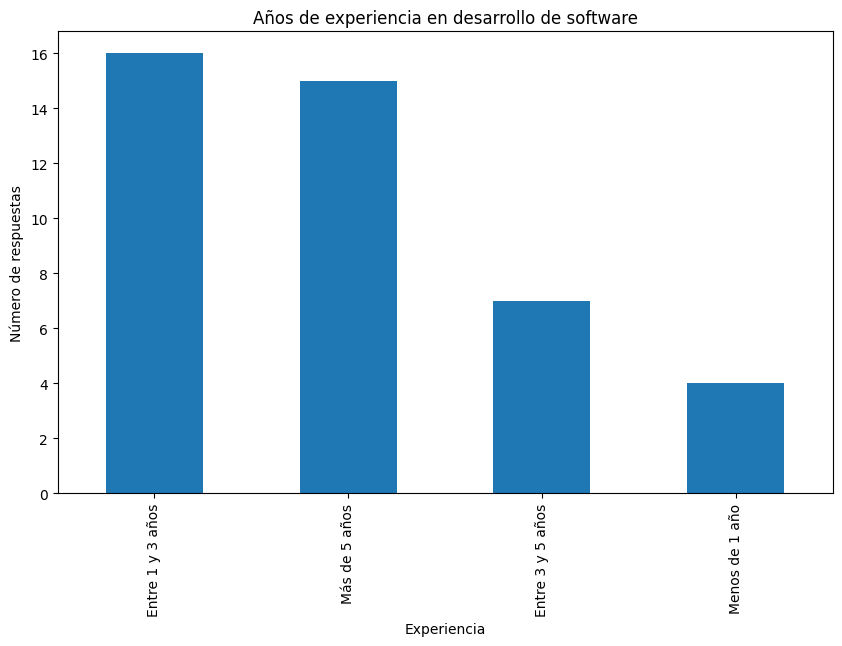

In [3]:

plt.figure(figsize=(10, 6))
data["¿Qué rol ocupa dentro de la organización donde trabaja actualmente?"].value_counts().plot(kind='bar')
plt.title("Distribución de Roles en la Organización")
plt.xlabel("Rol")
plt.ylabel("Número de respuestas")
plt.show()


plt.figure(figsize=(10, 6))
data["¿Cuántos años de experiencia tiene en desarrollo de software?"].value_counts().plot(kind='bar')
plt.title("Años de experiencia en desarrollo de software")
plt.xlabel("Experiencia")
plt.ylabel("Número de respuestas")
plt.show()


<div style="font-size: 40px; font-family: Verdana;">
    BLOQUE 3
</div>
</br>
</br>
<div style="font-size: 30px; font-family: Verdana;">
    Se filtra por aquellos que trabajan con enfoque ágil
</div>
<div style="font-size: 20px; font-family: Verdana;">
    1 - Primer grafico :  Frecuencia de uso de métricas para evaluación de precisión
</div>
</br>
<div style="font-size: 30px; font-family: Verdana;">
    Se limpia y convierte la columna de precisión percibida para manejar valores no numéricos
</div>
<div style="font-size: 20px; font-family: Verdana;">
    2 - Segundo grafico : Distribución de la precisión de las estimaciones
</div>

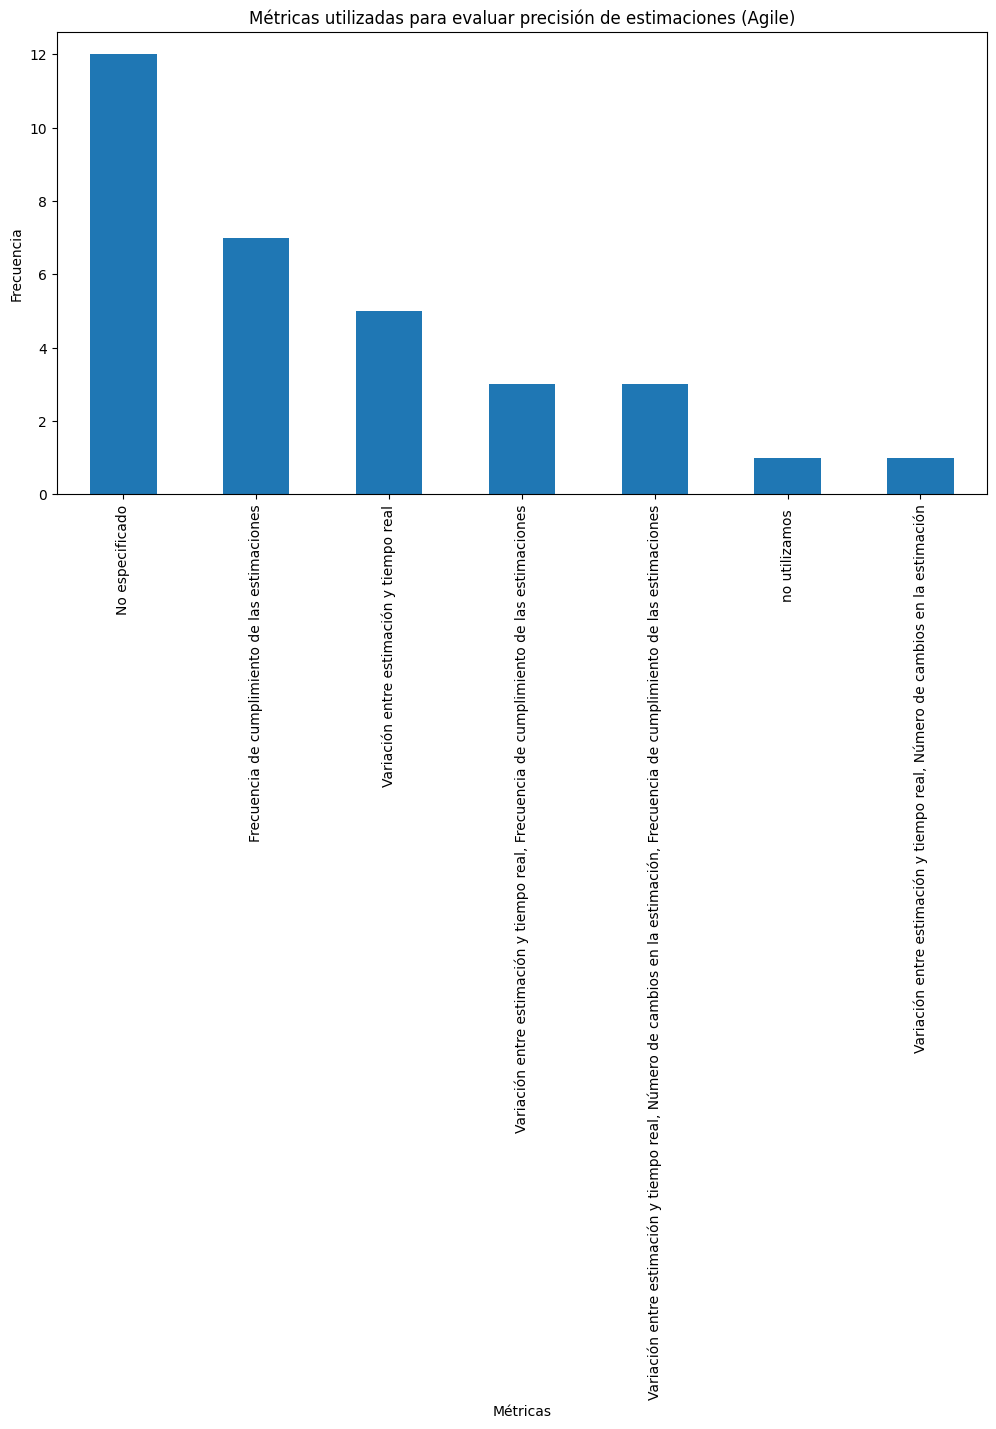

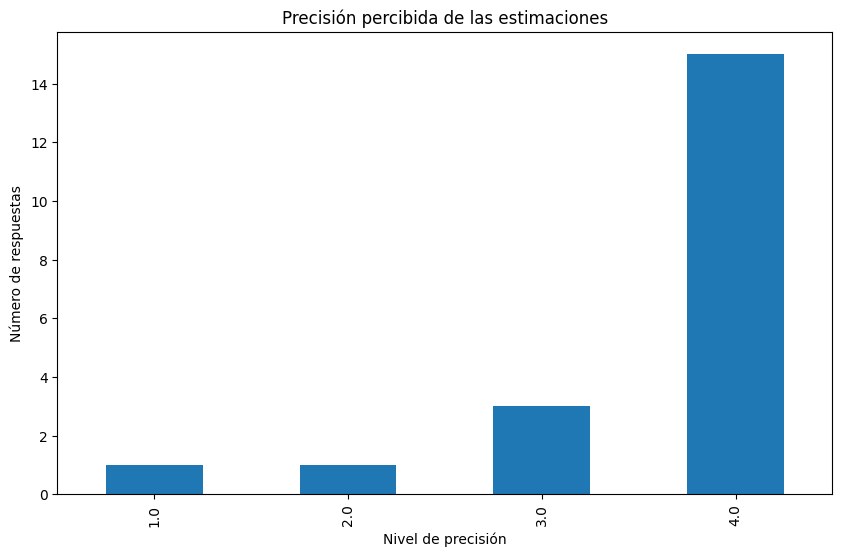

In [4]:
agile_data = data[data["¿Trabaja con un enfoque ágil de desarrollo de software?"] == "Si"]

plt.figure(figsize=(12, 6))
agile_data["En caso de que realicen seguimiento, ¿qué métricas utilizan para evaluar la precisión de las estimaciones? (Seleccione todas las opciones que apliquen)"].value_counts().plot(kind='bar')
plt.title("Métricas utilizadas para evaluar precisión de estimaciones (Agile)")
plt.xlabel("Métricas")
plt.ylabel("Frecuencia")
plt.show()


precisiones = pd.to_numeric(agile_data["¿Qué tan precisas considera que son las estimaciones de su equipo?"], errors='coerce').dropna()


plt.figure(figsize=(10, 6))
precisiones.value_counts().sort_index().plot(kind='bar')
plt.title("Precisión percibida de las estimaciones")
plt.xlabel("Nivel de precisión")
plt.ylabel("Número de respuestas")
plt.show()


<div style="font-size: 40px; font-family: Verdana;">
    BLOQUE 
</div>
</br>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    1 - Primer grafico :  Factores internos que afectan la precisión
</div>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    2 - Segundo grafico : Factores externos que afectan la precisión
</div>

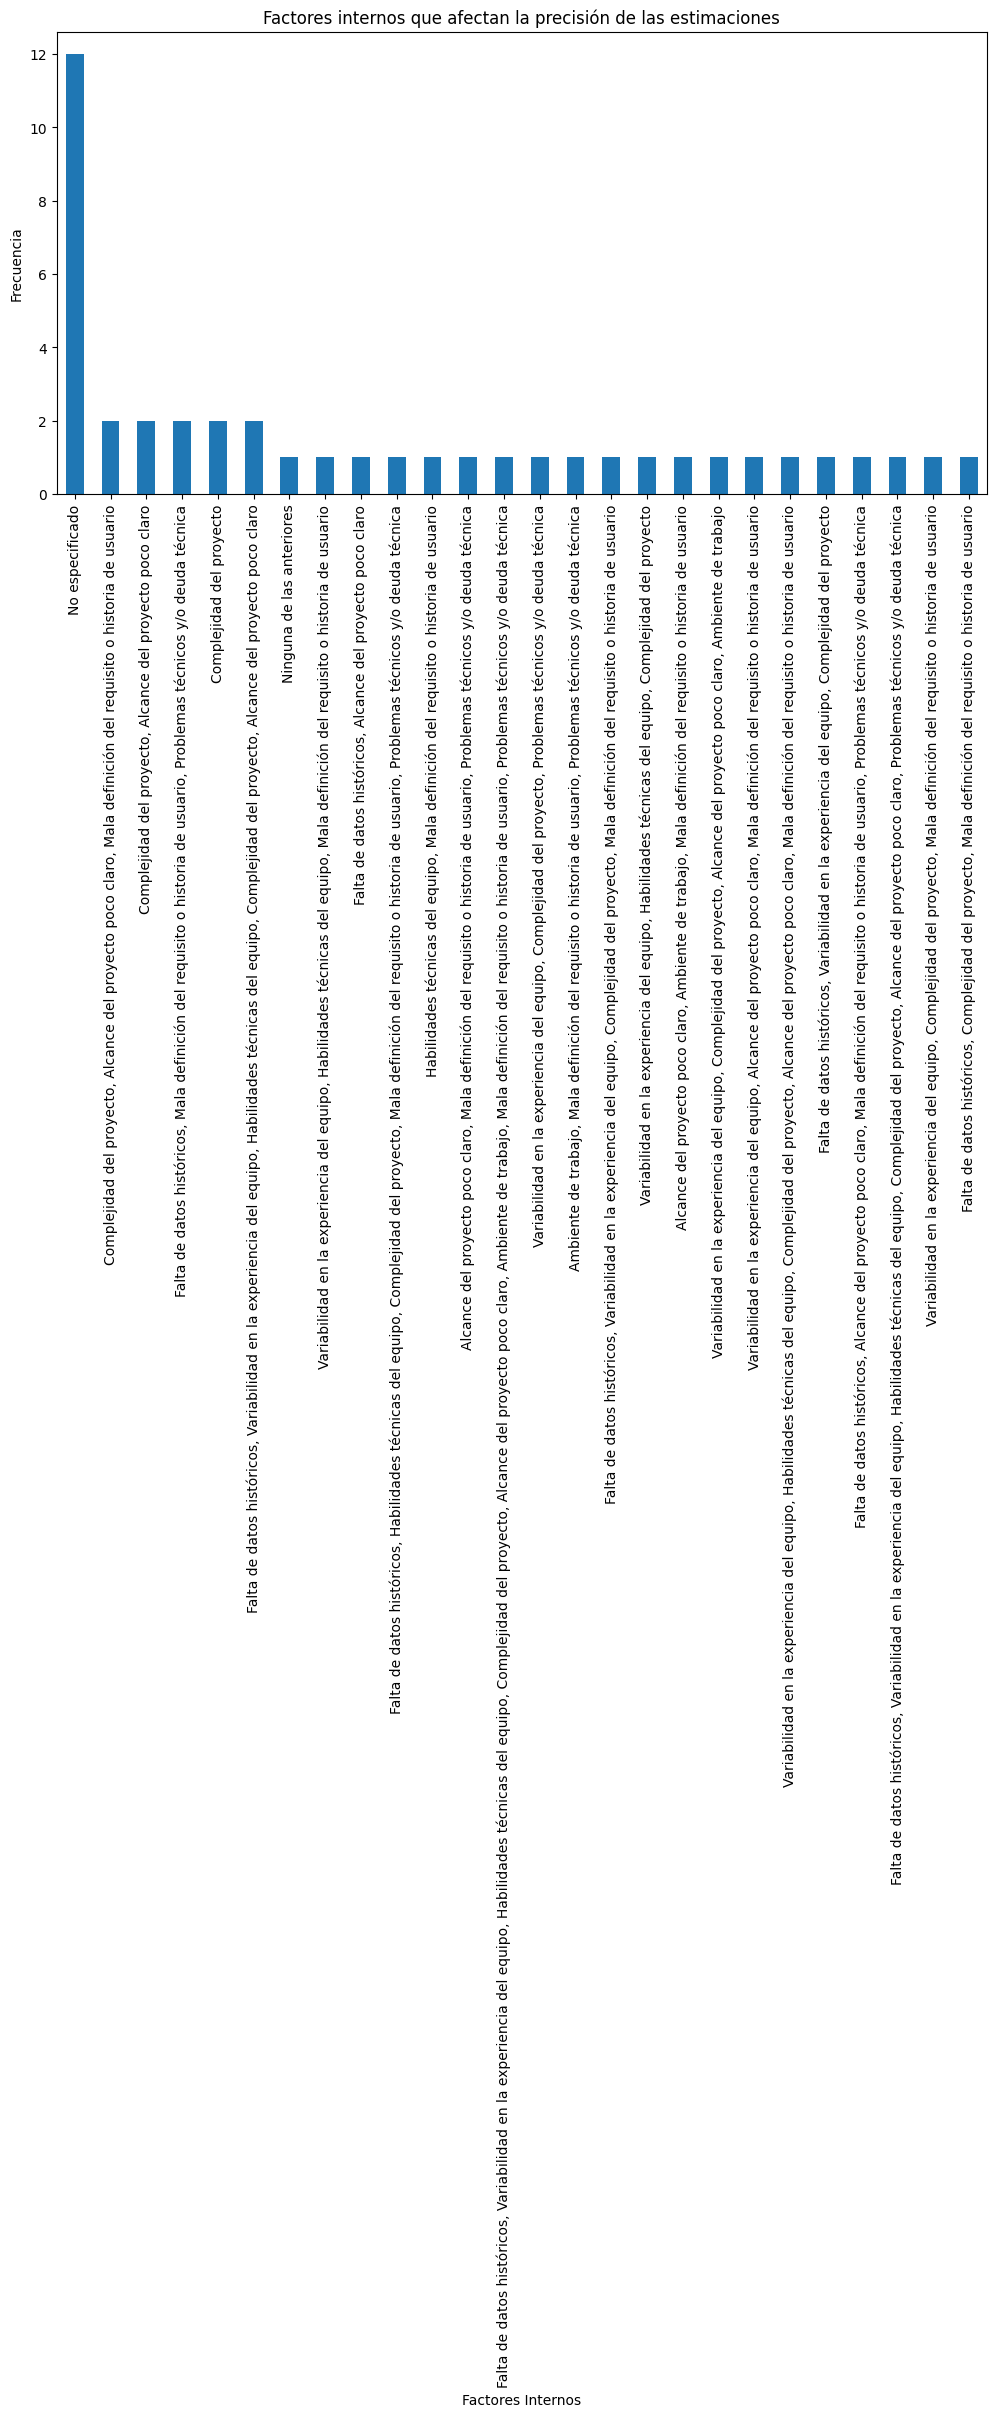

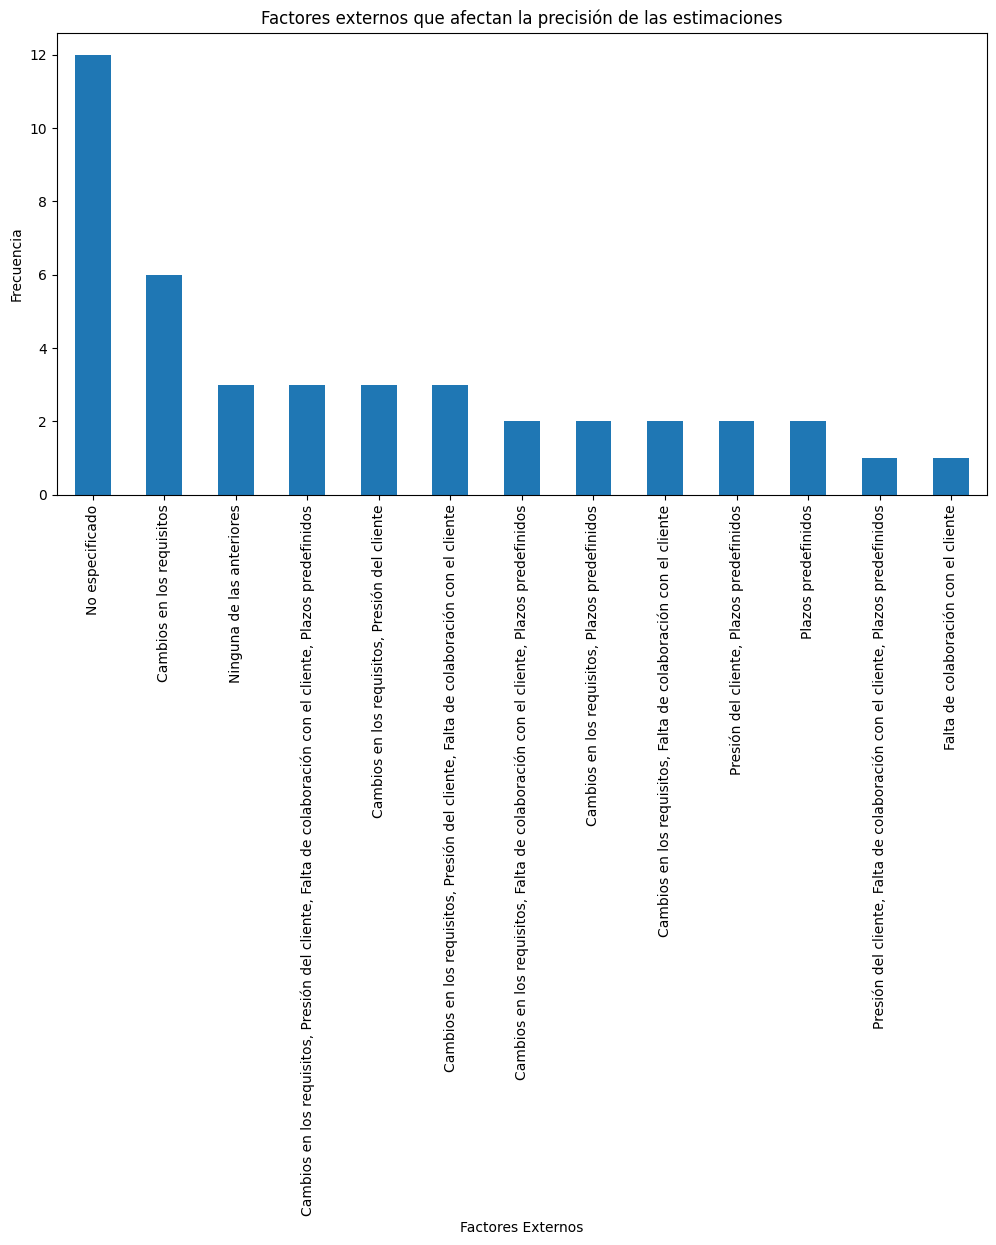

In [5]:
plt.figure(figsize=(12, 6))
data["¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)"].value_counts().plot(kind='bar')
plt.title("Factores internos que afectan la precisión de las estimaciones")
plt.xlabel("Factores Internos")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(12, 6))
data["¿Cuáles considera que son los principales factores externos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)"].value_counts().plot(kind='bar')
plt.title("Factores externos que afectan la precisión de las estimaciones")
plt.xlabel("Factores Externos")
plt.ylabel("Frecuencia")
plt.show()


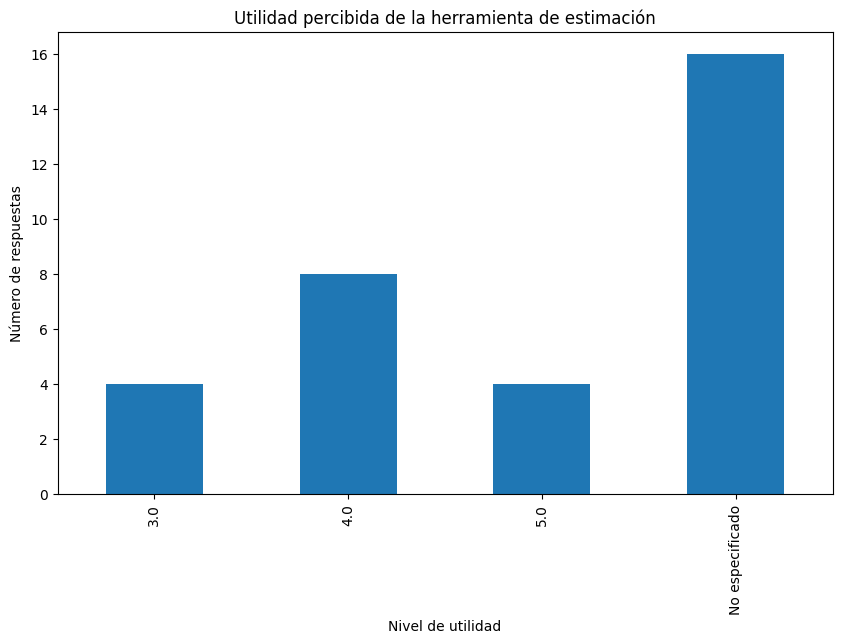

Problemas comunes reportados con la herramienta de estimación:
¿Existen inconvenientes o caracteristicas de la herramienta donde registra estimaciones que no le guste o considere contra-producente? -
No especificado                                                                                                                                                    27
No                                                                                                                                                                  3
No se considera en ninguna herramienta una segunda puntuacion que podria estimar iteracioneso cambios en torno al feedback de tareas ya realizadas o estimadas.     1
Las herramientas lo tratan como algo secundario                                                                                                                     1
Name: count, dtype: int64


In [6]:

# Utilidad de las herramientas de estimación
plt.figure(figsize=(10, 6))
agile_data["Si utiliza una herramienta para registrar las estimaciones, ¿Qué tan útil la considera? "].astype(str).value_counts().sort_index().plot(kind='bar')
plt.title("Utilidad percibida de la herramienta de estimación")
plt.xlabel("Nivel de utilidad")
plt.ylabel("Número de respuestas")
plt.show()

# Aspectos negativos de la herramienta de estimación
tool_issues = agile_data["¿Existen inconvenientes o caracteristicas de la herramienta donde registra estimaciones que no le guste o considere contra-producente? -"].value_counts()
print("Problemas comunes reportados con la herramienta de estimación:")
print(tool_issues)


C:\Users\chuch\AppData\Local\Temp\ipykernel_4148\1605870413.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


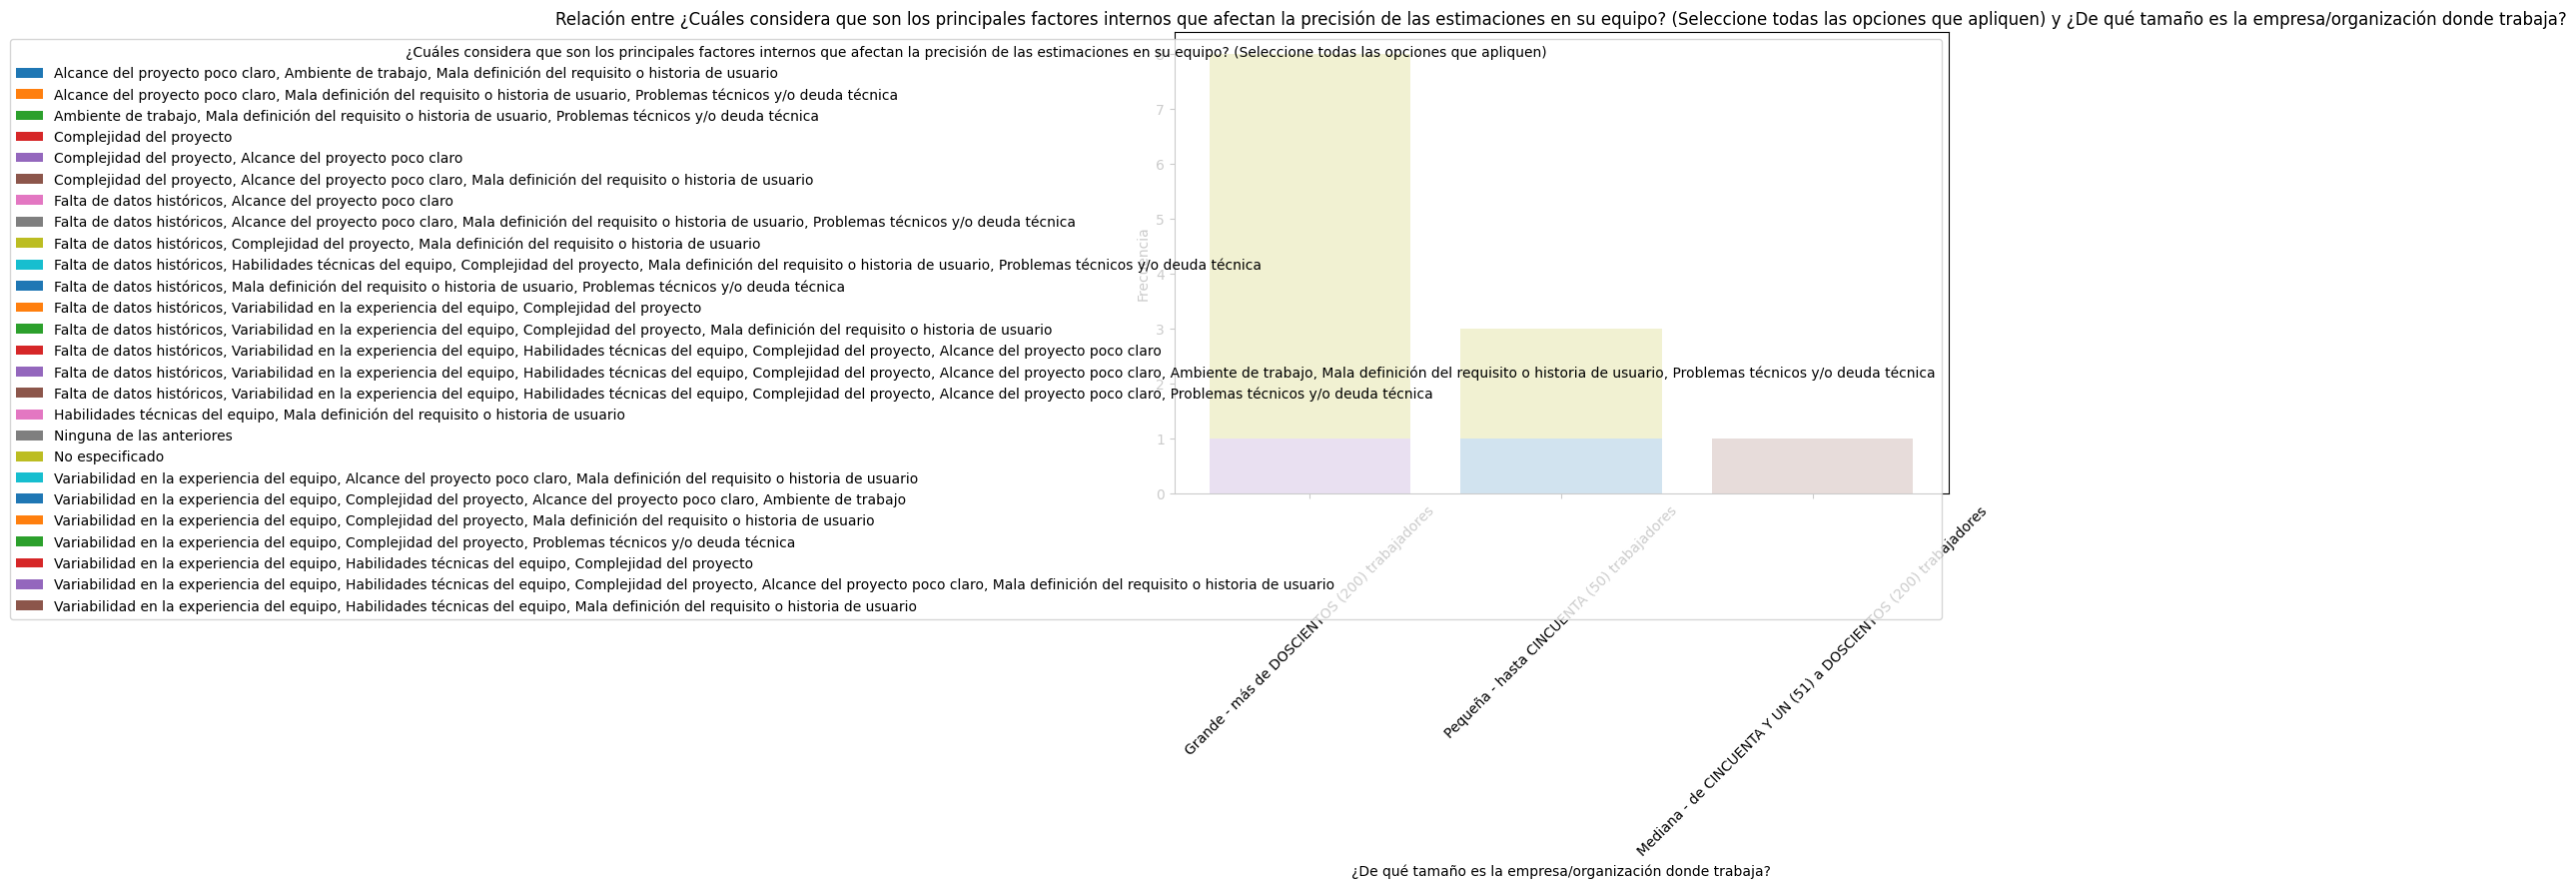

Conteo de Interacciones entre las columnas:
   ¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)  \
0   Alcance del proyecto poco claro, Ambiente de t...                                                                                                                    
1   Alcance del proyecto poco claro, Mala definici...                                                                                                                    
2   Ambiente de trabajo, Mala definición del requi...                                                                                                                    
3                            Complejidad del proyecto                                                                                                                    
4                            Complejidad del proyecto                                                     

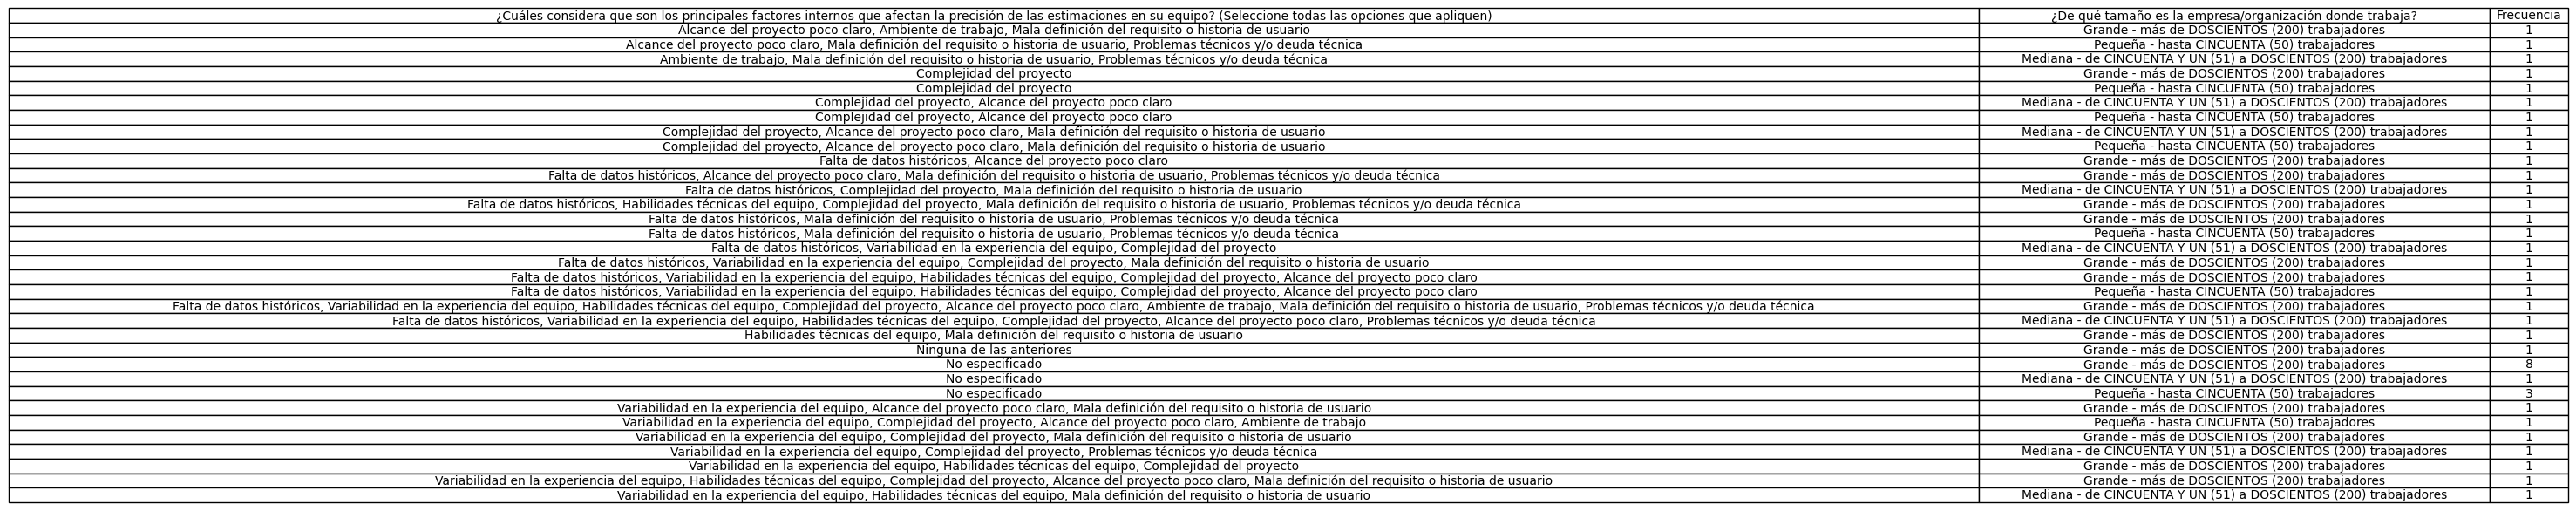

In [10]:
columna2 = '¿De qué tamaño es la empresa/organización donde trabaja?'
columna1 = '¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)'

# Contar las frecuencias de las combinaciones de valores
combinaciones = data.groupby([columna1, columna2]).size().reset_index(name='Frecuencia')

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
for key, group in combinaciones.groupby(columna1):
    ax.bar(
        group[columna2],
        group['Frecuencia'],
        label=key
    )

ax.set_xlabel(columna2)
ax.set_ylabel('Frecuencia')
ax.set_title(f'Relación entre {columna1} y {columna2}')
ax.legend(title=columna1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar conteo de interacciones
print("Conteo de Interacciones entre las columnas:")
print(combinaciones)

# Mostrar la tabla como gráfico si es necesario
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=combinaciones.values,
    colLabels=combinaciones.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(combinaciones.columns))))
#plt.title(f"Conteo de interacciones entre {columna1} y {columna2}")
plt.show()

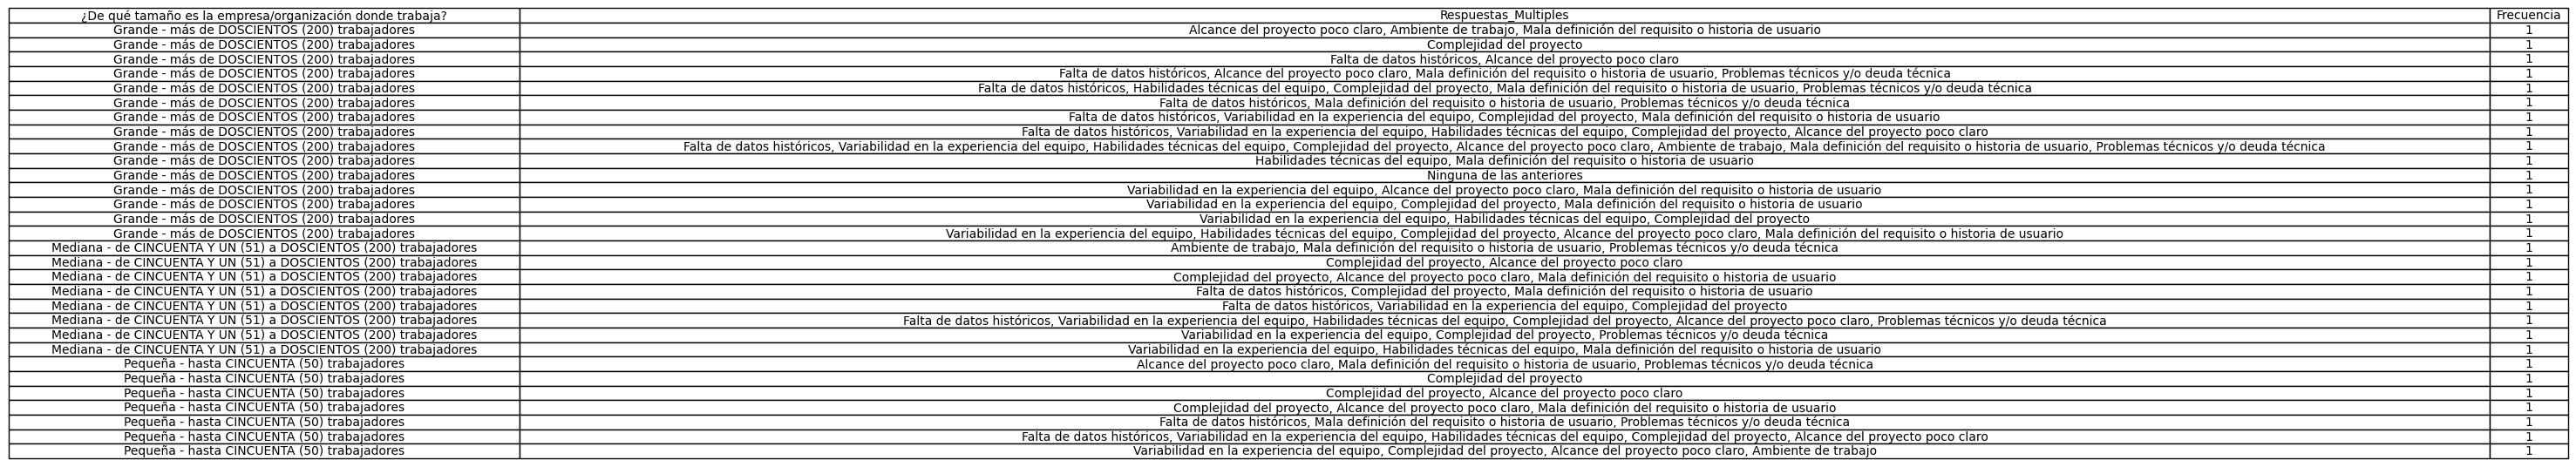

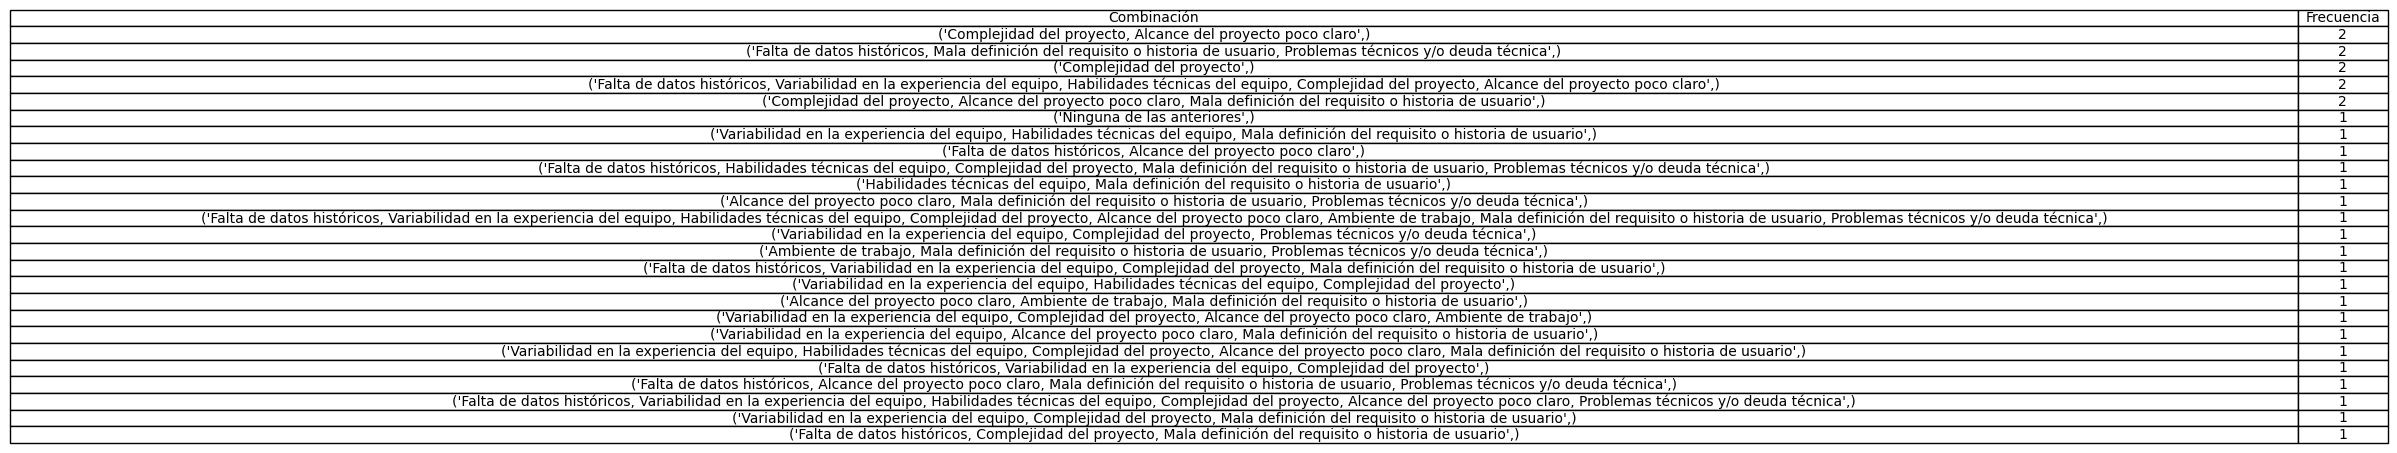

In [15]:
columna1 = '¿De qué tamaño es la empresa/organización donde trabaja?'
columna2 = '¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)'


# Desglosar las respuestas múltiples en listas
data['Respuestas_Multiples'] = data[columna2].str.split(';')

# Crear combinaciones únicas para cada fila (ignorar el orden)
data['Combinaciones'] = data['Respuestas_Multiples'].apply(
    lambda x: tuple(sorted(x)) if isinstance(x, list) else x
)

# Contar frecuencias de combinaciones de respuestas múltiples
combinaciones_mult = Counter(data['Combinaciones'].dropna())

# Crear el DataFrame de combinaciones más frecuentes
df_combinaciones = pd.DataFrame(combinaciones_mult.items(), columns=['Combinación', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Contar las frecuencias de las combinaciones entre columna1 y columna2
combinaciones = data.explode('Respuestas_Multiples').groupby([columna1, 'Respuestas_Multiples']).size().reset_index(name='Frecuencia')

# Mostrar conteo de interacciones en formato tabla
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=combinaciones.values,
    colLabels=combinaciones.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(combinaciones.columns))))
#plt.title(f"Conteo de interacciones entre {columna1} y {columna2}")
plt.show()

# Mostrar combinaciones de respuestas múltiples más comunes en formato tabla
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df_combinaciones.values,
    colLabels=df_combinaciones.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df_combinaciones.columns))))
#plt.title("Combinaciones de respuestas múltiples más comunes")
plt.show()

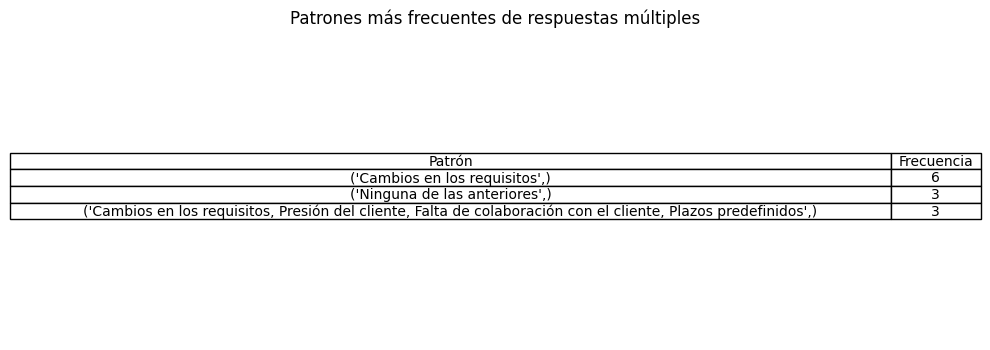

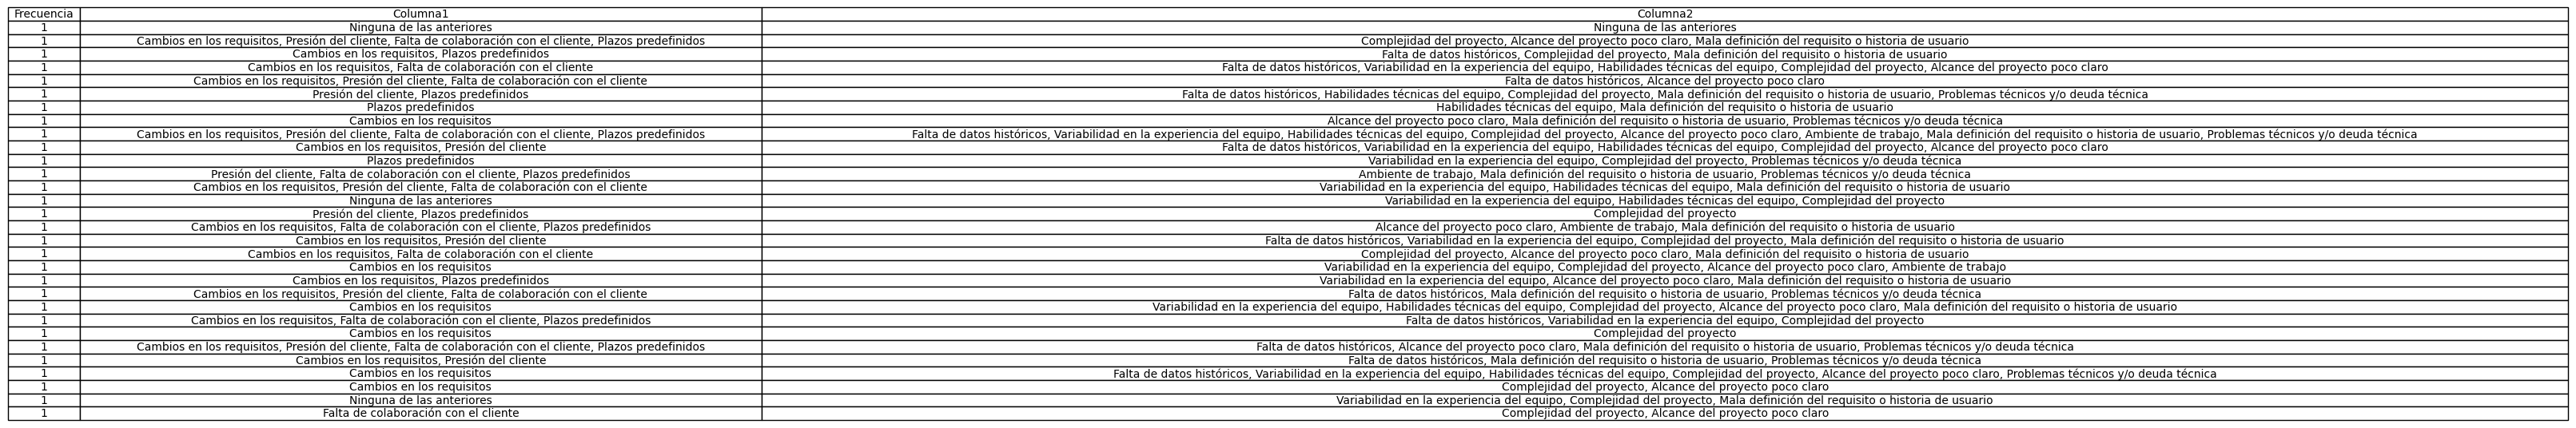

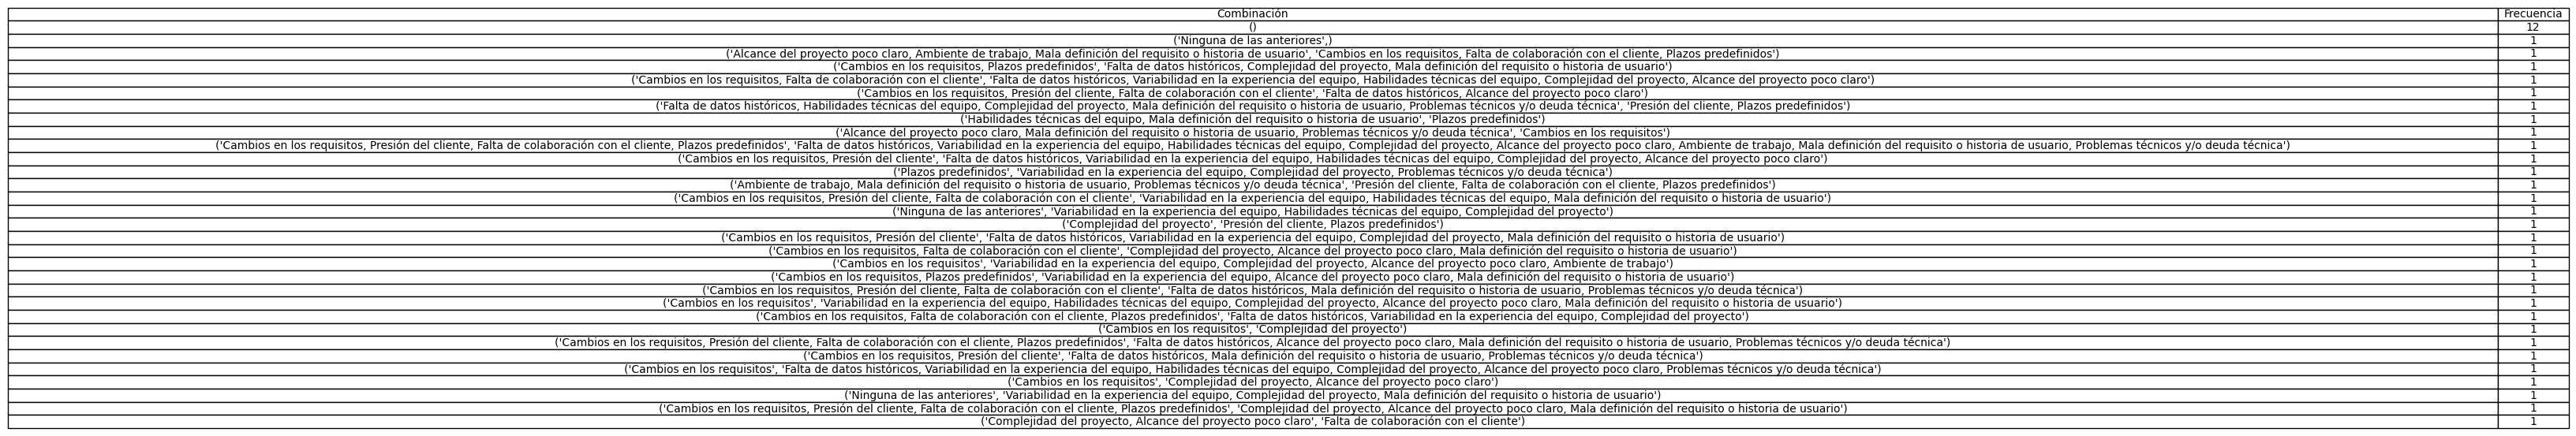

In [28]:
# Asegurar que los valores de las columnas sean listas
data['Respuestas_Multiples_Col1'] = data['Respuestas_Multiples_Col1'].apply(lambda x: x if isinstance(x, list) else [])
data['Respuestas_Multiples_Col2'] = data['Respuestas_Multiples_Col2'].apply(lambda x: x if isinstance(x, list) else [])

# Crear combinaciones únicas entre las respuestas de ambas columnas y convertirlas a tuplas
data['Combinaciones'] = data.apply(
    lambda row: tuple(sorted(set(row['Respuestas_Multiples_Col1']) | set(row['Respuestas_Multiples_Col2']))),
    axis=1
)

# Contar las frecuencias de combinaciones de respuestas únicas
combinaciones_mult = Counter(data['Combinaciones'].dropna())

# Crear DataFrame de combinaciones más frecuentes
df_combinaciones = pd.DataFrame(combinaciones_mult.items(), columns=['Combinación', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Contar las interacciones entre respuestas múltiples de columna 1 y columna 2
interacciones = []
for col1_respuestas, col2_respuestas in zip(data['Respuestas_Multiples_Col1'], data['Respuestas_Multiples_Col2']):
    for respuesta1 in col1_respuestas:
        for respuesta2 in col2_respuestas:
            interacciones.append((respuesta1, respuesta2))

# Contar las frecuencias de las interacciones
interacciones_contadas = Counter(interacciones)

# Convertir a DataFrame para visualización
df_interacciones = pd.DataFrame(interacciones_contadas.items(), columns=['Interacción', 'Frecuencia'])
df_interacciones[['Columna1', 'Columna2']] = pd.DataFrame(df_interacciones['Interacción'].tolist(), index=df_interacciones.index)
df_interacciones = df_interacciones.drop(columns=['Interacción']).sort_values(by='Frecuencia', ascending=False)


# Generar subconjuntos de tamaño 3 para cada combinación y contar sus frecuencias
subconjuntos = []
for respuestas in data['Combinaciones']:
    if len(respuestas) >= 1:  # Solo considerar combinaciones con al menos 3 elementos
        subconjuntos.extend(combinations(sorted(set(respuestas)), 1))

# Contar las frecuencias de los subconjuntos
subconjuntos_contados = Counter(subconjuntos)

# Crear un DataFrame con los tres subconjuntos más frecuentes
df_subconjuntos = pd.DataFrame(
    subconjuntos_contados.most_common(3),
    columns=['Patrón', 'Frecuencia']
)

# Verificar si el DataFrame no está vacío antes de mostrar la tabla
if not df_subconjuntos.empty:
    # Mostrar la tabla de patrones más frecuentes
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_subconjuntos.values,
        colLabels=df_subconjuntos.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_subconjuntos.columns))))
    plt.title("Patrones más frecuentes de respuestas múltiples")
    plt.show()
else:
    print("No se encontraron patrones frecuentes con al menos 3 elementos.")

# Mostrar tabla de interacciones
if not df_interacciones.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_interacciones.values,
        colLabels=df_interacciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_interacciones.columns))))
    #plt.title("Interacciones entre respuestas múltiples de columna 1 y columna 2")
    plt.show()
else:
    print("No se encontraron interacciones frecuentes entre columna 1 y columna 2.")

# Mostrar combinaciones de respuestas múltiples más comunes en formato tabla
if not df_combinaciones.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_combinaciones.values,
        colLabels=df_combinaciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_combinaciones.columns))))
    #plt.title("Combinaciones de respuestas múltiples más comunes")
    plt.show()
else:
    print("No se encontraron combinaciones frecuentes de respuestas múltiples.")

